In [196]:
import requests
import pandas as pd
from datetime import datetime

In [197]:
API_KEY = 'kWelKbzApdVVMZhSAfZCaEXLcUCEevuh'  # Consider using environment variables for security
BASE_URL = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'

In [198]:
def fetch_noaa_data(endpoint, params):
    headers = {'token': API_KEY}
    response = requests.get(BASE_URL + endpoint, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return None

In [199]:
params = {
    'datasetid': 'GHCND',  # Global Historical Climatology Network - Daily dataset
    'stationid': 'GHCND:USW00094728',  # Example station ID for New York Central Park
    'startdate': '2022-01-01',
    'enddate': '2023-01-31',
    'limit': 1000,  # Adjust based on your needs
    'units': 'metric',
    'datatypeid': ['TMAX', 'TMIN'],  # Max and Min temperatures
}

data = fetch_noaa_data('data', params)

# Convert to DataFrame for analysis
if data:
    df = pd.DataFrame(data['results'])
    print(df.head())
else:
    print("No data fetched.")

                  date datatype            station attributes  value
0  2022-01-01T00:00:00     TMAX  GHCND:USW00094728   ,,W,2400   13.3
1  2022-01-01T00:00:00     TMIN  GHCND:USW00094728   ,,W,2400   10.0
2  2022-01-02T00:00:00     TMAX  GHCND:USW00094728   ,,W,2400   15.0
3  2022-01-02T00:00:00     TMIN  GHCND:USW00094728   ,,W,2400    2.8
4  2022-01-03T00:00:00     TMAX  GHCND:USW00094728   ,,W,2400    2.8


In [200]:
df.to_csv('out.csv', index=False)  

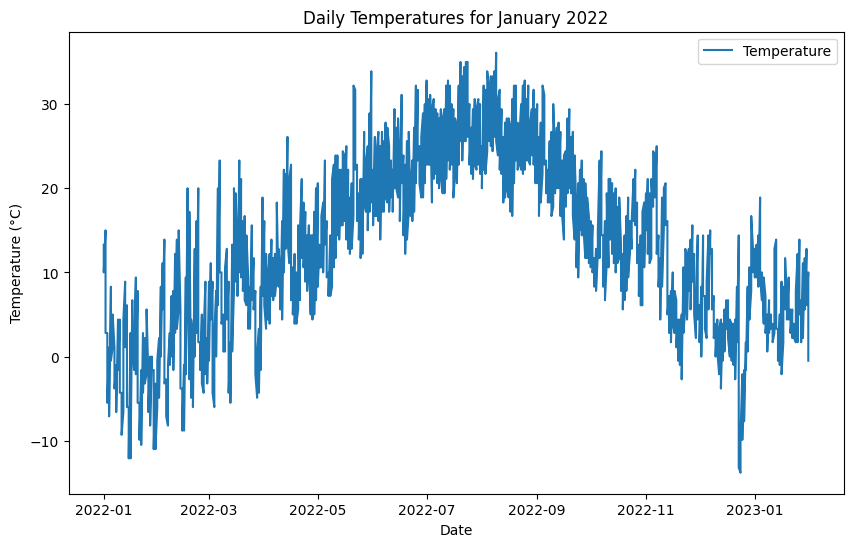

In [201]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format and sort
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], label='Temperature')
plt.title('Daily Temperatures for January 2022')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()